# **Business Understanding**
According to Cytonn's report on Kenya's listed insurance sector for H1 2023, insurance penetration in Kenya remains historically low. As of FY 2022, penetration stood at just 2.3%, according to the Kenya National Bureau of Statistics (KNBS) 2023 Economic Survey. This is notably below the global average of 7.0%, as reported by the Swiss Re Institute. The low penetration rate is largely attributed to the perception of insurance as a luxury rather than a necessity, and it is often purchased only when required or mandated by regulation. Additionally, a pervasive mistrust of insurance providers has significantly contributed to the low uptake.

Despite the critical importance of non-liability insurance—such as health, property, and personal accident coverage—for financial protection against unforeseen events, many individuals find it challenging to identify a trustworthy insurance provider. This project seeks to address this pressing issue by simplifying the process of selecting a suitable insurance provider based on their performance in settling non-liability claims. By enhancing transparency and fostering trust in insurance providers, the project aims to boost insurance uptake and overall customer satisfaction.


# **Problem Statement**
Our goal is to create a recommender system designed to assist Kenyan customers in identifying the most reliable insurance providers. By leveraging historical data, this system will evaluate and rank insurers based on their track record in non liability claim settlements, ultimately guiding customers toward the most dependable options.


## **Objectives**

We shall be seeking to achieve the following key objectives with our recommender system:

1. **Enhanced Transparency:** By providing clear and detailed information on insurers' performance, we aim to improve market transparency and help customers make well-informed decisions.

2. **Increased Customer Trust:** Our goal is to build greater trust between customers and insurance providers by showcasing insurers' reliability in settling non-liability claims.

3. **Boosted Insurance Uptake:** We seek to encourage more people to purchase insurance by simplifying the process of finding trustworthy insurers, thereby increasing overall market penetration.

4. **Improved Customer Satisfaction:** By guiding customers toward insurers with strong claim settlement records, we aim to enhance their overall satisfaction with the insurance experience

# **Metrics of Success**
To ensure the success of our recommender system modeling, we shall:

1. **Achieve High Accuracy:** We will aim for an F1 Score of at least 0.75, ensuring our model effectively identifies reliable insurers while balancing Precision and Recall.

2. **Minimize Prediction Error:** We will target a Mean Absolute Error (MAE) of less than 0.2, indicating that our model’s predictions closely match the actual performance data of insurance providers.

3. **Optimize Recommendations:** We will strive for a Precision at K of at least 0.7 for the top 5 recommendations, ensuring that 70% of these top recommendations are both relevant and reliable.

## **Data Understanding**
The dataset obtained from Insurance Regulatory Authority(IRA) website (https://www.ira.go.ke/index.php/publications/statistical-reports/claims-settlement-*statistics*) contains the following columns:

Date: Date of the record.

Insurer: Name of the insurance company.

Claims_outstanding_at_the_beginning: Claims outstanding at the beginning of the period.

Claims_intimated_and_revived: Claims intimation and revival during the period.

Claims_revised: Claims revised during the period.

Total_Claims_Payable: Total claims payable.

Claims_paid: Claims paid during the period.

Claims_declined: Claims declined during the period.

Claims_closed_as_no_claims: Claims closed as no claims.

Total_Claims_Action_during_the_Quarter: Total claims action during the quarter.

Claims_outstanding_at_the_end: Claims outstanding at the end of the period.

Claims_declined_ratio_(%): Claims declined ratio.

Claims_closed_as_no_claims_ratio (%): Claims closed as no claims ratio.

Claim_payment_ratio_(%): Claim payment ratio.

Claim_payment_ratio_(%)_prev: Previous claim payment ratio.

**Importing the Libraries**

In [6]:
# Import Libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score



**Importing the Dataset**

In [8]:
#loading the data
df=pd.read_excel("/content/Final Combined Claims Data.xlsx")
df.head()

,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Claim_payment_ratio_(%)_prev
0,30/06/2018,AAR INSURANCE KENYA LIMITED,26026,129415,0,155441.0,133313,512,3630,137455.0,17986,0.329385,2.335291,85.764374,NaN
1,30/06/2018,MADISON INSURANCE COMPANY,8078,67173,0,75251.0,62025,2713,0,64738.0,10513,3.605268,0,82.424154,NaN
2,30/06/2018,THE KENYAN ALLIANCE INSURANCE,188,735,0,923.0,740,32,0,772.0,151,3.466956,0,80.173348,NaN
3,30/06/2018,JUBILEE INSURANCE COMPANY,407645,910498,66,1318209.0,1046058,0,973,1047031.0,271178,0,0.073812,79.354488,NaN
4,30/06/2018,RESOLUTION INSURANCE COMPANY,37666,117847,2,155515.0,113835,3112,6,116953.0,38562,2.001093,0.003858,73.198727,NaN


#  **Data Cleaning**

### **Handling Null Values**

### **Handling Duplicates**

# **Data Preprocessing**

#### **Converting Data types as necessary**

#### **Feature Engineering**

# **Exploratory Data Analysis (EDA)**

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [10]:
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter



In [12]:
df.head()

,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Claim_payment_ratio_(%)_prev,Year,Quarter
0,2018-06-30,AAR INSURANCE KENYA LIMITED,26026,129415,0,155441.0,133313,512,3630,137455.0,17986,0.329385,2.335291,85.764374,NaN,2018,2
1,2018-06-30,MADISON INSURANCE COMPANY,8078,67173,0,75251.0,62025,2713,0,64738.0,10513,3.605268,0,82.424154,NaN,2018,2
2,2018-06-30,THE KENYAN ALLIANCE INSURANCE,188,735,0,923.0,740,32,0,772.0,151,3.466956,0,80.173348,NaN,2018,2
3,2018-06-30,JUBILEE INSURANCE COMPANY,407645,910498,66,1318209.0,1046058,0,973,1047031.0,271178,0,0.073812,79.354488,NaN,2018,2
4,2018-06-30,RESOLUTION INSURANCE COMPANY,37666,117847,2,155515.0,113835,3112,6,116953.0,38562,2.001093,0.003858,73.198727,NaN,2018,2


In [16]:
# Select numeric columns excluding Year and Quarter
numeric_columns = df.select_dtypes(include=['number']).columns.difference(['Year', 'Quarter'])

# Aggregate the numeric data
aggregated_data = df.groupby(['Year', 'Quarter'])[numeric_columns].sum().reset_index()

df.head()


,Date,Insurer,Claims_outstanding_at_the_beginning,Claims_intimated_and_revived,Claims_revised,Total_Claims_Payable,Claims_paid,Claims_declined,Claims_closed_as_no_claims,Total_Claims_Action_during_the_Quarter,Claims_outstanding_at_the_end,Claims_declined_ratio_(%),Claims_closed_as_no_claims_ratio (%),Claim_payment_ratio_(%),Claim_payment_ratio_(%)_prev,Year,Quarter
0,2018-06-30,AAR INSURANCE KENYA LIMITED,26026,129415,0,155441.0,133313,512,3630,137455.0,17986,0.329385,2.335291,85.764374,NaN,2018,2
1,2018-06-30,MADISON INSURANCE COMPANY,8078,67173,0,75251.0,62025,2713,0,64738.0,10513,3.605268,0,82.424154,NaN,2018,2
2,2018-06-30,THE KENYAN ALLIANCE INSURANCE,188,735,0,923.0,740,32,0,772.0,151,3.466956,0,80.173348,NaN,2018,2
3,2018-06-30,JUBILEE INSURANCE COMPANY,407645,910498,66,1318209.0,1046058,0,973,1047031.0,271178,0,0.073812,79.354488,NaN,2018,2
4,2018-06-30,RESOLUTION INSURANCE COMPANY,37666,117847,2,155515.0,113835,3112,6,116953.0,38562,2.001093,0.003858,73.198727,NaN,2018,2


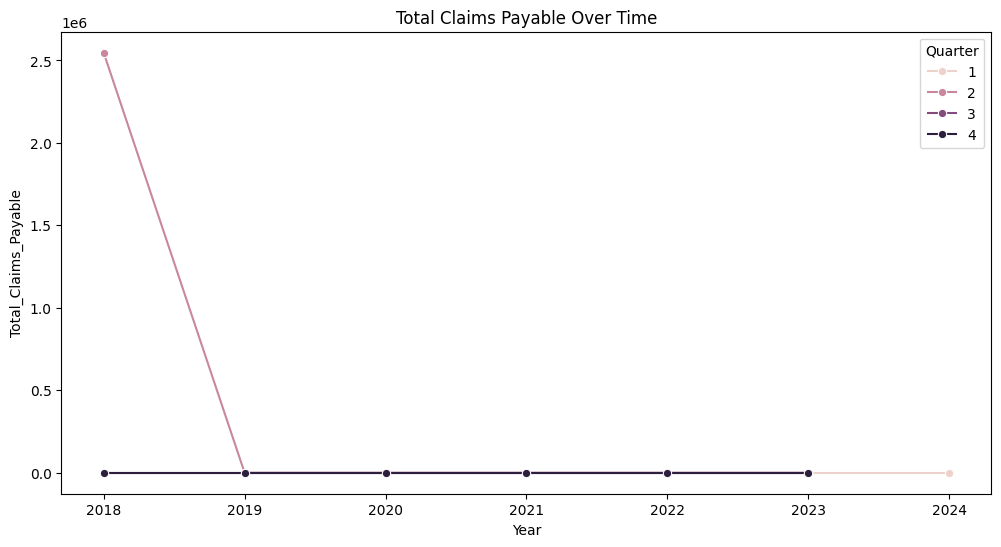

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Total Claims Payable over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='Year', y='Total_Claims_Payable', hue='Quarter', marker='o')
plt.title('Total Claims Payable Over Time')
plt.show()


In [21]:
# Select numeric columns for aggregation
numeric_columns = df.select_dtypes(include=['number']).columns.difference(['Year', 'Quarter'])

# Aggregate the numeric data by Year, Quarter, and Insurer
aggregated_data = df.groupby(['Year', 'Quarter', 'Insurer'])[numeric_columns].sum().reset_index()


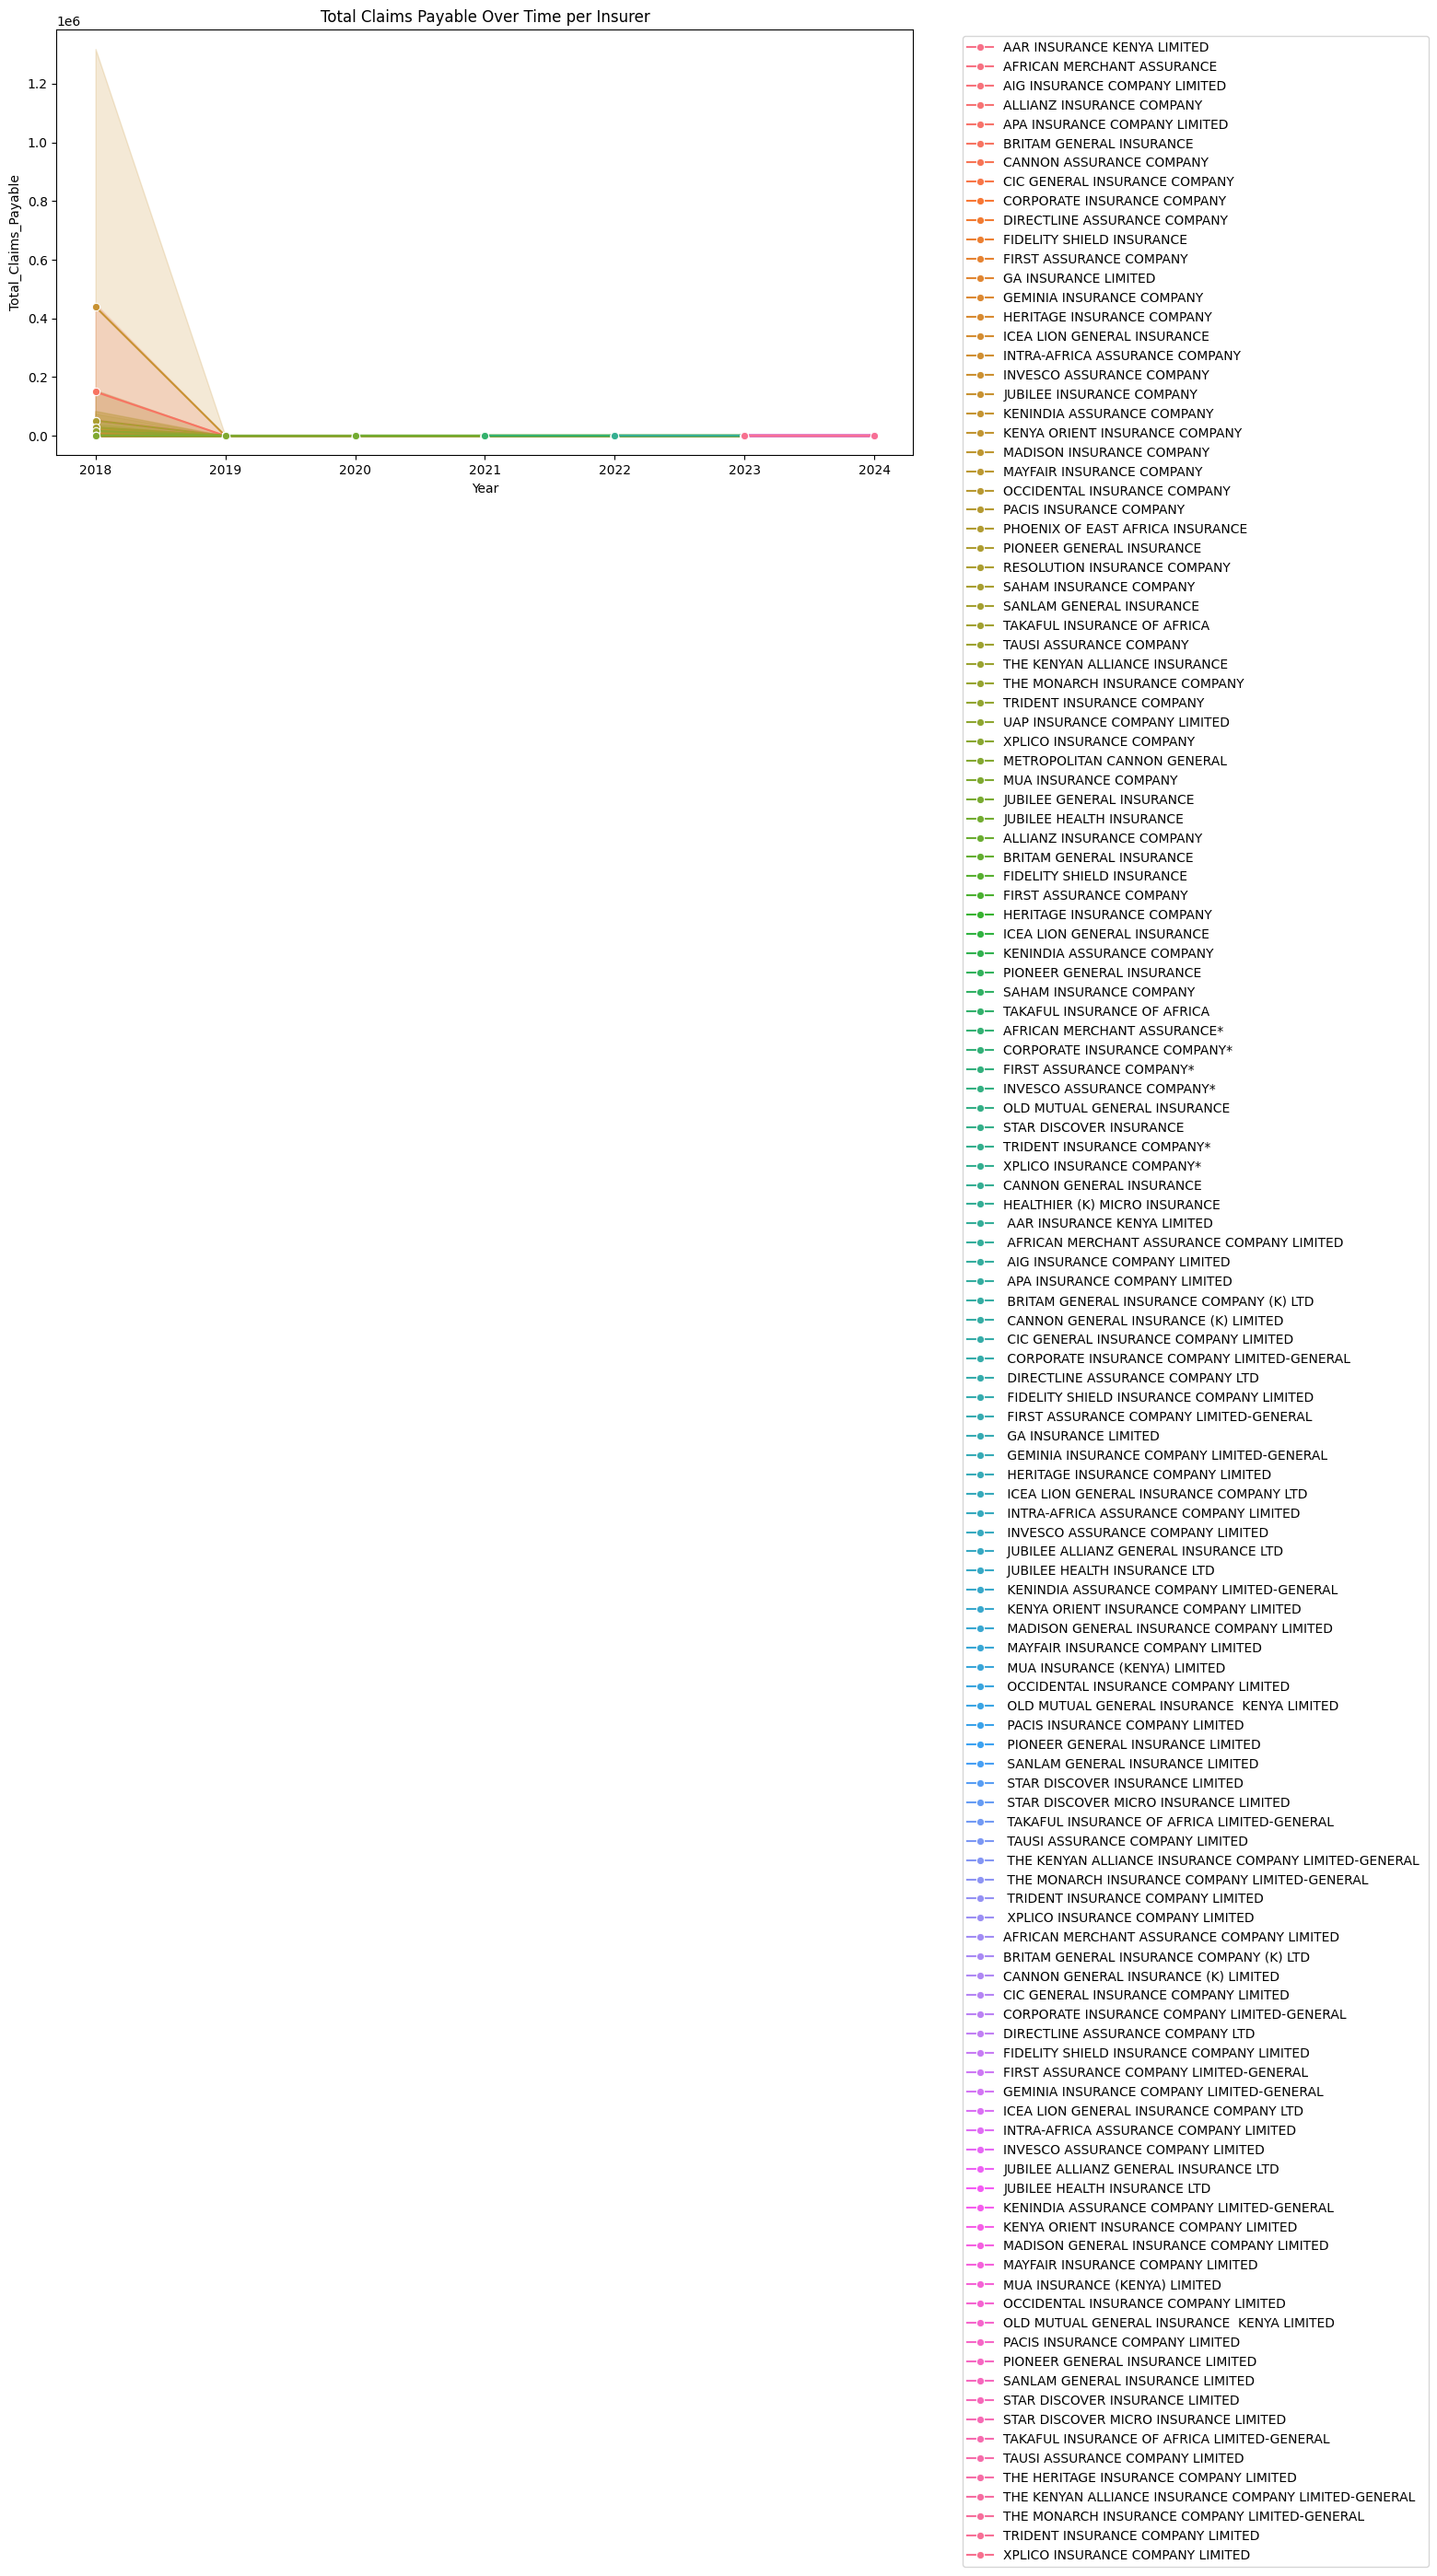

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Total Claims Payable over time per insurer
plt.figure(figsize=(12, 6))
sns.lineplot(data=aggregated_data, x='Year', y='Total_Claims_Payable', hue='Insurer', marker='o')
plt.title('Total Claims Payable Over Time per Insurer')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
def normalize_column_names(columns):
    return columns.str.replace('\n', ' ').str.strip().str.replace(' +', ' ', regex=True)

# Normalize the column names in the combined dataframe
combined_df.columns = normalize_column_names(combined_df.columns)

# Display the first few rows of the normalized dataframe
combined_df.head()


,No,Name of Insurer,Claims outstanding at the beginning of the Quarter (1),Claims intimated during the quarter (2),Claims revived during the quarter (3),Total Claims Payable during the Quarter (1+2+3) (4),Claims paid during the quarter (5),Claims declined during the quarter (6),Claims closed as no claims during the quarter (7),Total Claims Action during the Quarter (5+6+7) (8),...,Claim payment ratio (%) Q4 2019 (4/(4+5+6+7)),Claim payment ratio (%) Q3 2019,Claim settlement ratio (%)(4/(4+5+6+7)) Q2 2019 (10),Claim settlement ratio (%) (4/(4+5+6+7)) Q1 2019 (11),Claim payment ratio (%) Q3 2019 (4/(4+5+6+7)) (10),Claim payment ratio (%) Q2 2019 (11),Declined claims ratio % (5/(4+5+6+7)) (8),Claims closed as no claims ratio % (6/(4+5+6+7)) (9),Claim settlement ratio % Q1 2019 (4/(4+5+6+7)) (10),Claim settlement ratio % Q1 2019 Q4 2018 (11)
0,1.0,AAR INSURANCE KENYA LIMITED,26026.0,129415.0,0.0,155441.0,133313.0,512.0,3630.0,137455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,MADISON INSURANCE COMPANY,8078.0,67173.0,0.0,75251.0,62025.0,2713.0,0.0,64738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,THE KENYAN ALLIANCE INSURANCE,188.0,735.0,0.0,923.0,740.0,32.0,0.0,772.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,JUBILEE INSURANCE COMPANY,407645.0,910498.0,66.0,1318209.0,1046058.0,0.0,973.0,1047031.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,RESOLUTION INSURANCE COMPANY,37666.0,117847.0,2.0,155515.0,113835.0,3112.0,6.0,116953.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.shape

(459, 51)

In [ ]:
# Check if any files were found
if not csv_files:
    print("No CSV files found. Please check the file path and pattern.")
else:
    # Initialize an empty list to hold dataframes
    dataframes = []

    # Loop through the list of files and read each one into a dataframe, then append to the list
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

In [ ]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 No                                                               12
Name of Insurer                                                   0
Claims outstanding at\nthe beginning of the Quarter (1)         422
Claims intimated during\nthe quarter (2)                        154
Claims revived during\nthe quarter (3)                          154
Total Claims Payable during the Quarter\n(1+2+3) (4)            422
Claims paid\nduring the quarter (5)                             422
Claims declined\nduring the quarter (6)                         422
Claims closed as no claims \nduring the quarter (7)             422
Total Claims Action during the Quarter\n(5+6+7) (8)             422
Claims outstanding at\nthe end of the quarter \n(4-8) (9)       422
Declined claims\nratio %\n\n(6/4)*100 (10)                      422
Claims closed as\nno claims \nratio %\n\n(7/4)*100 (11)         422
Claim settlement ratio % Q2 2018 (5/4)*100 (12)                 422
Claims outstandi